<a href="https://colab.research.google.com/github/IhsanRidhoAsmoro/MachineLearningTask/blob/main/tugas6/K_Means_withotherdatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
cars= pd.read_csv('/content/cars.csv')
x = cars.iloc[:, [0, 1, 2, 3]].values

In [4]:
cars.info()
cars[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32174 entries, 0 to 32173
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  32174 non-null  object 
 1   model_name         32174 non-null  object 
 2   transmission       32174 non-null  object 
 3   color              32174 non-null  object 
 4   odometer_value     32174 non-null  int64  
 5   year_produced      32174 non-null  int64  
 6   engine_fuel        32174 non-null  object 
 7   engine_has_gas     32174 non-null  bool   
 8   engine_type        32174 non-null  object 
 9   engine_capacity    32164 non-null  float64
 10  body_type          32174 non-null  object 
 11  has_warranty       32174 non-null  bool   
 12  state              32174 non-null  object 
 13  drivetrain         32174 non-null  object 
 14  price_usd          32174 non-null  float64
 15  is_exchangeable    32174 non-null  bool   
 16  location_region    321

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16.0
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83.0
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151.0
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86.0
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7.0
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,True,False,True,True,True,67.0
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,...,True,False,False,True,True,False,False,True,True,307.0
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,False,False,True,73.0
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,...,True,True,True,True,True,True,True,True,True,87.0
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,...,True,True,False,False,True,False,False,False,True,43.0


In [8]:
cars_outcome = pd.crosstab(index=cars["transmission"],  # Make a crosstab
                              columns="color")      # Name the count column

cars_outcome

col_0,color
transmission,
automatic,10184
mechanical,21990


In [10]:
automatic=cars.loc[cars["transmission"]=="automatic"]
mechanical=cars.loc[cars["transmission"]=="mechanical"]

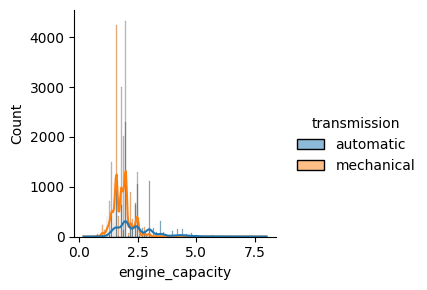

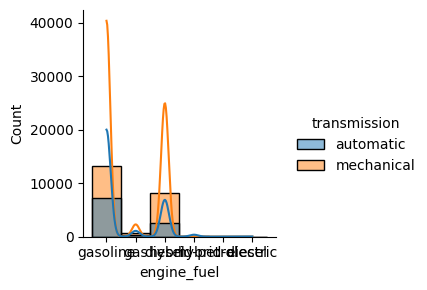

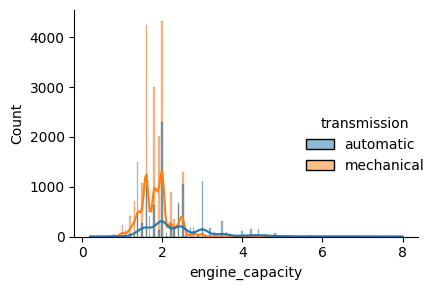

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=cars, x="engine_capacity", hue="transmission", height=3, kde=True)
sns.displot(data=cars, x="engine_fuel", hue="transmission", height=3, kde=True)

g = sns.displot(data=cars, x="engine_capacity", hue="transmission", height=3, kde=True)
g.add_legend()


<Axes: xlabel='engine_fuel', ylabel='Count'>

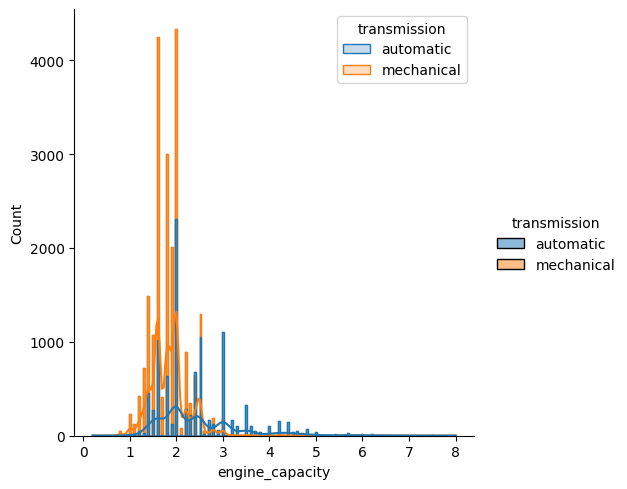

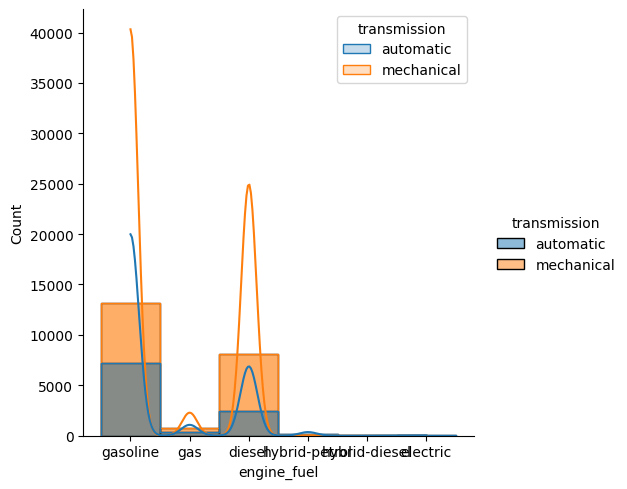

In [18]:
import seaborn as sns

sns.displot(data=cars, x="engine_capacity", hue="transmission", kde=True)
sns.histplot(data=cars, x="engine_capacity", hue="transmission", element="step", common_norm=False)
sns.displot(data=cars, x="engine_fuel", hue="transmission", kde=True)
sns.histplot(data=cars, x="engine_fuel", hue="transmission", element="step", common_norm=False)
